# 2.2 t-SNE Applications Based on the Breast Cancer Dataset

## Imports

In [18]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from matplotlib.patches import Patch 
from sklearn.metrics import mean_squared_error
from datetime import datetime, date, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

## Data Loading

In [12]:
df_data = pd.read_csv("../data/breastcancer/data.csv")
df_clean = df_data.copy()
df_clean.drop(columns=['id', 'Unnamed: 32'], inplace=True)  # Limpiamos columnas innecesarias

# Separar características y etiquetas (diagnosis nos dira si es maligno o benigno)
X = df_clean.drop(columns=['diagnosis'])
y = df_clean['diagnosis']

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### t-SNE IMPLEMENTATION

Usamos StandardScaler para estandarizar los datos, ya que t-SNE se basa en distancia

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=30,      # para un dataset pequeño, un valor entre 5 y 50 suele ser adecuado
    learning_rate=200,
    max_iter=1000,      # número de iteraciones para la optimización
    random_state=42     # reproducibilidad
)

X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['diagnosis'] = y.values

tsne_df.head()

,t-SNE 1,t-SNE 2,diagnosis
0,17.878355,27.426546,M
1,3.424699,19.655260,M
2,11.998223,25.845383,M
3,22.753428,7.668540,M
4,11.971152,16.841667,M


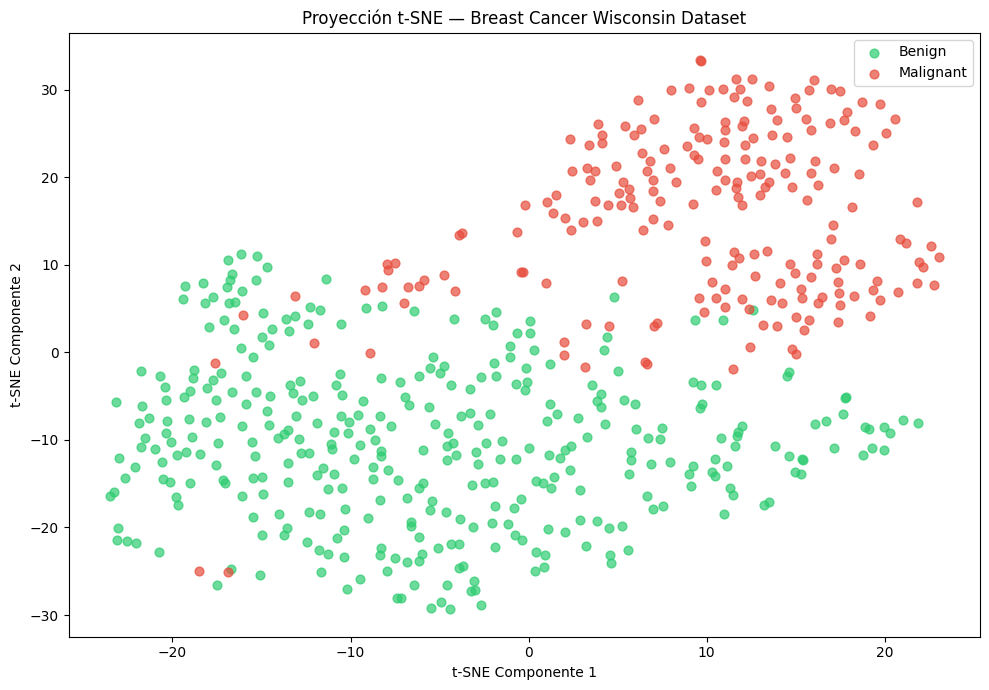

In [21]:
plt.figure(figsize=(10, 7))
colors = {'M': '#e74c3c', 'B': '#2ecc71'}

for diagnosis, group in tsne_df.groupby('diagnosis'):
    label = 'Malignant' if diagnosis == 'M' else 'Benign'
    plt.scatter(group['t-SNE 1'], group['t-SNE 2'],
                c=colors[diagnosis], label=label, alpha=0.7, s=40)

plt.title('Proyección t-SNE — Breast Cancer Wisconsin Dataset')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend()
plt.tight_layout()
plt.show()

La proyección t-SNE con perplexity=30 reveló una separación clara entre tumores malignos y benignos sin haber utilizado la variable diagnosis durante el entrenamiento. Esto confirma que las 30 variables numéricas contienen suficiente estructura intrínseca para distinguir ambos tipos de tumor.

Los tumores malignos forman un cluster más compacto y cohesivo, sugiriendo que comparten patrones de medición consistentes entre sí. Los tumores benignos presentan mayor dispersión, lo que indica mayor variabilidad interna en sus características.

La zona donde se sobreponen entre ambos grupos en todos los valores de perplexity representa casos borderline clínicamente difíciles de clasificar, lo cual es coherente con la realidad médica del diagnóstico de cáncer de mama

### Probamos otros valores de perplexity effect para evaluar resultados

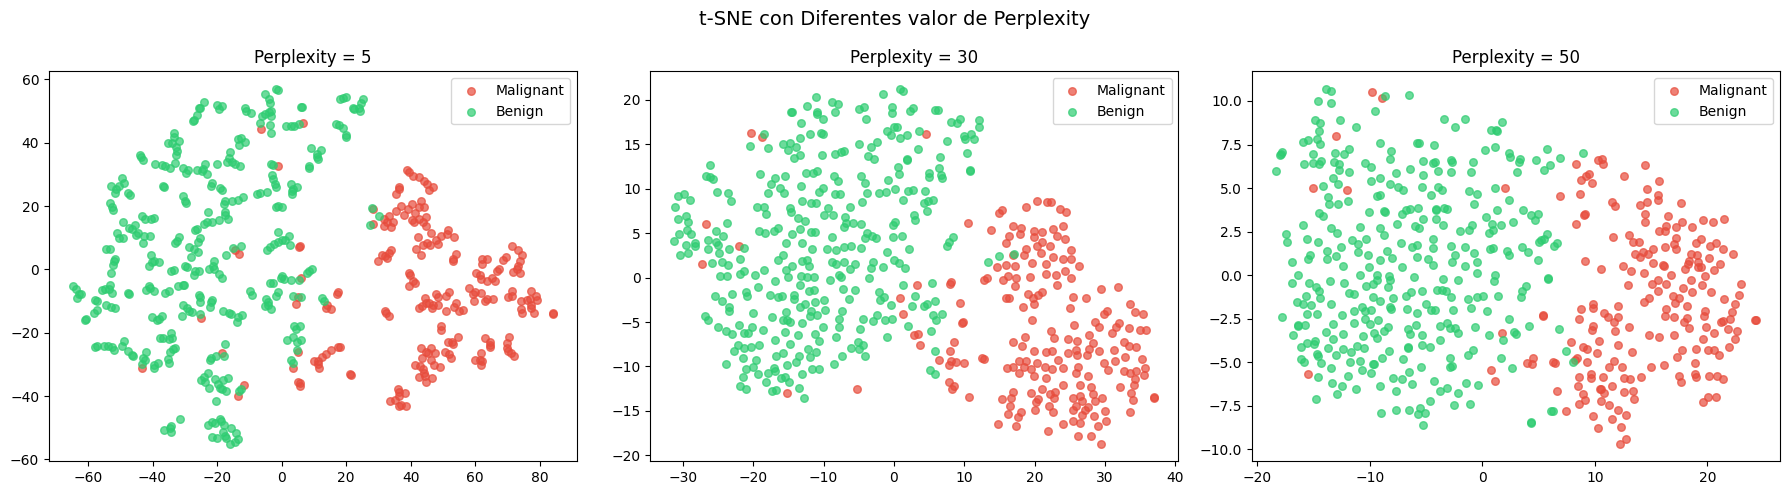

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
perplexities = [5, 30, 50]

for ax, perp in zip(axes, perplexities):
    tsne_p = TSNE(n_components=2, perplexity=perp,
                  random_state=42, max_iter=1000)
    X_p = tsne_p.fit_transform(X_scaled)
    
    for diag, color, label in [('M', '#e74c3c', 'Malignant'), 
                                 ('B', '#2ecc71', 'Benign')]:
        mask = y.values == diag
        ax.scatter(X_p[mask, 0], X_p[mask, 1],
                   c=color, label=label, alpha=0.7, s=30)
    
    ax.set_title(f'Perplexity = {perp}')
    ax.legend()

plt.suptitle('t-SNE con Diferentes valor de Perplexity', fontsize=14)
plt.tight_layout()
plt.show()


Al comparar diferentes valores de perplexity se observa un efecto notable. Con perplexity=5, la separación entre clases es visible pero los grupos se fragmentan en sub-clusters locales debido al enfoque excesivamente local del algoritmo. Con perplexity=30, se obtiene el balance óptimo entre estructura local y global, produciendo la separación más limpia. Con perplexity=50, los clusters pierden definición y aumenta el solapamiento entre clases, ya que el algoritmo prioriza demasiado la estructura global.

Una limitación importante de t-SNE es que las distancias absolutas entre clusters no son interpretables — solo importa si los puntos están juntos o separados. Además, cada ejecución puede producir resultados ligeramente distintos si no se fija random_state.